In [23]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris = datasets.load_iris()
iris2 = datasets.load_iris()
iris.target_names
# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['species'])
# replace the values with class labels
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.species==1.0,'versicolor', 'virginica'))
# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')
iris.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


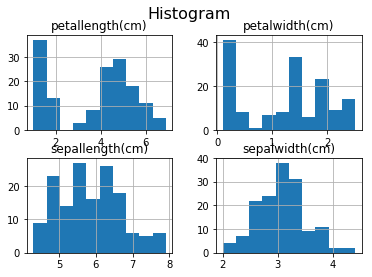

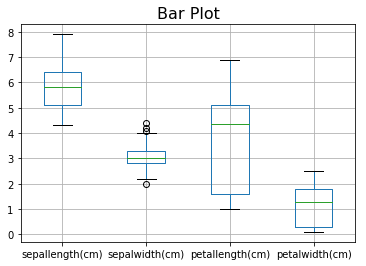

In [42]:

iris.hist() # plot histogram
plt.suptitle("Histogram", fontsize=16) # use suptitle to add title to all sublots
plt.show()
iris.boxplot() # plot boxplot
plt.title("Bar Plot", fontsize=16)
plt.show()

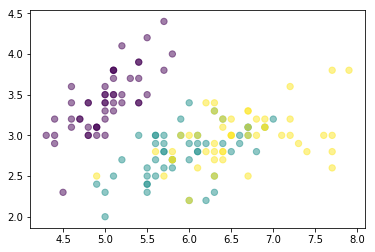

In [80]:
#plt.figure(figsize=(8,8))
#plt.plot(iris2.data[:,0],iris2.data[:,3],color='b')
close=iris2.target*2
fig, ax = plt.subplots()
fig.size=(16,16)
ax.scatter(iris2.data[:,0],iris2.data[:,1], c=close,s=40, alpha=0.5)
plt.show()

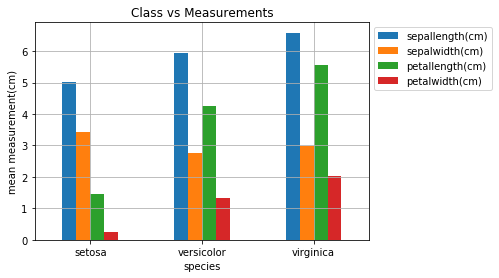

In [43]:
# print the mean for each column by species
iris.groupby(by = "species").mean()
# plot for mean of each feature for each label class
iris.groupby(by = "species").mean().plot(kind="bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0) # manage the xticks rotation
plt.grid(True)
# Use bbox_to_anchor option to place the legend outside plot area to be tidy
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

                 sepallength(cm)  sepalwidth(cm)  petallength(cm)  \
sepallength(cm)         1.000000       -0.109369         0.871754   
sepalwidth(cm)         -0.109369        1.000000        -0.420516   
petallength(cm)         0.871754       -0.420516         1.000000   
petalwidth(cm)          0.817954       -0.356544         0.962757   

                 petalwidth(cm)  
sepallength(cm)        0.817954  
sepalwidth(cm)        -0.356544  
petallength(cm)        0.962757  
petalwidth(cm)         1.000000  


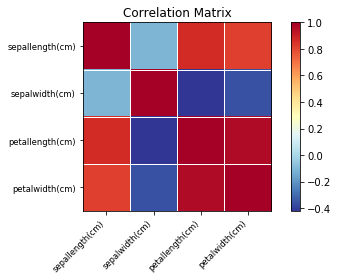

In [81]:
# create correlation matrix
corr = iris.corr()
print(corr)
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


Text(0.5,0.98,'Pair Plot')

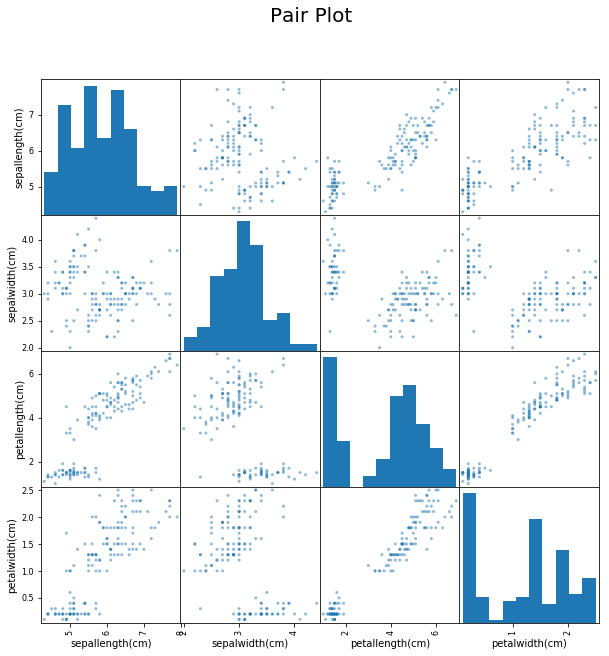

In [82]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris, figsize=(10, 10))
# use suptitle to add title to all sublots
plt.suptitle("Pair Plot", fontsize=20)

In [83]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [120]:
iris.columns=['A','B','C','D','E']
import sklearn.linear_model as lm
# Create linear regression object
lr = lm.LinearRegression()
x= iris.A[:, np.newaxis] # independent variable
y= iris.C.values # dependent variable
# Train the model using the training sets
lr.fit(x, y)
print("Intercept: ", lr.intercept_)
print ("Coefficient: ", lr.coef_)
iris['ycalc'] = lr.predict(x)

Intercept:  -7.0953814782793145
Coefficient:  [1.85750967]


Text(0.5,0,'A')

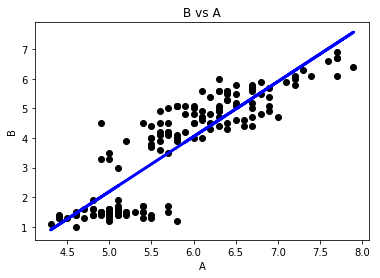

In [117]:
# plotting fitted line
plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('B vs A')
plt.ylabel('B')
plt.xlabel('A')


In [122]:
# Using built-in function
print("R Squared using built-in function: ", r2_score(iris.ycalc, y))
print("Mean Absolute Error: ", mean_absolute_error(y, iris.ycalc))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y,iris.ycalc)))

R Squared using built-in function:  0.6841331512298713
Mean Absolute Error:  0.7060119824037672
Root Mean Squared Error:  0.8615800435216119


0.7599553107783261
0.7773529983578708
0.7829223920775235
0.7987395878401413
0.7987501169944549


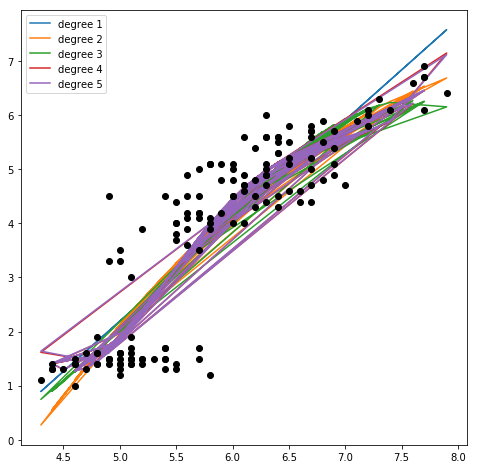

In [136]:
x1=iris.A
y1=iris.C
plt.figure(figsize=(8,8))
for deg in [1, 2, 3, 4, 5]:
    lr.fit(np.vander(x1, deg + 1), y1)
    y_lr = lr.predict(np.vander(x1, deg + 1))
    plt.plot(x1, y_lr, label='degree ' + str(deg))
    plt.legend(loc=2)
    print(r2_score(y1, y_lr))
plt.plot(x1, y1, 'ok')

R Squared using built-in function:  0.7987395878401309


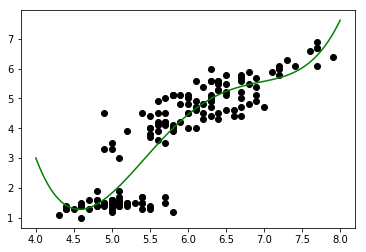

In [164]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
lr = lm.LinearRegression()
x2=np.linspace(4,8,100)
x3=[]
for xr in x2:
    x3.append([xr])
x= iris.A[:, np.newaxis] # independent variable
y= iris.C.values # dependent variable
degree = 4
model = make_pipeline(PolynomialFeatures(degree), lr)
model.fit(x, y)
plt.scatter(x, y, color='black')
plt.plot(x3, model.predict(x3), color='green')
print("R Squared using built-in function: ", r2_score(y, model.predict(x)))